In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
file_path = r"C:\Users\rayya\OneDrive\Desktop\Programs\Financial-Management-Dataset-\Financial_Data\MoneyControl\Companies\IT Services & Consulting\3i Infotech Ltd\Pruned_Excel\BCPLRY\std_quarterly.xlsx"
df = pd.read_excel(file_path)


In [21]:

# Drop non-numeric columns (if any)
df_numeric = df.select_dtypes(include=['number'])

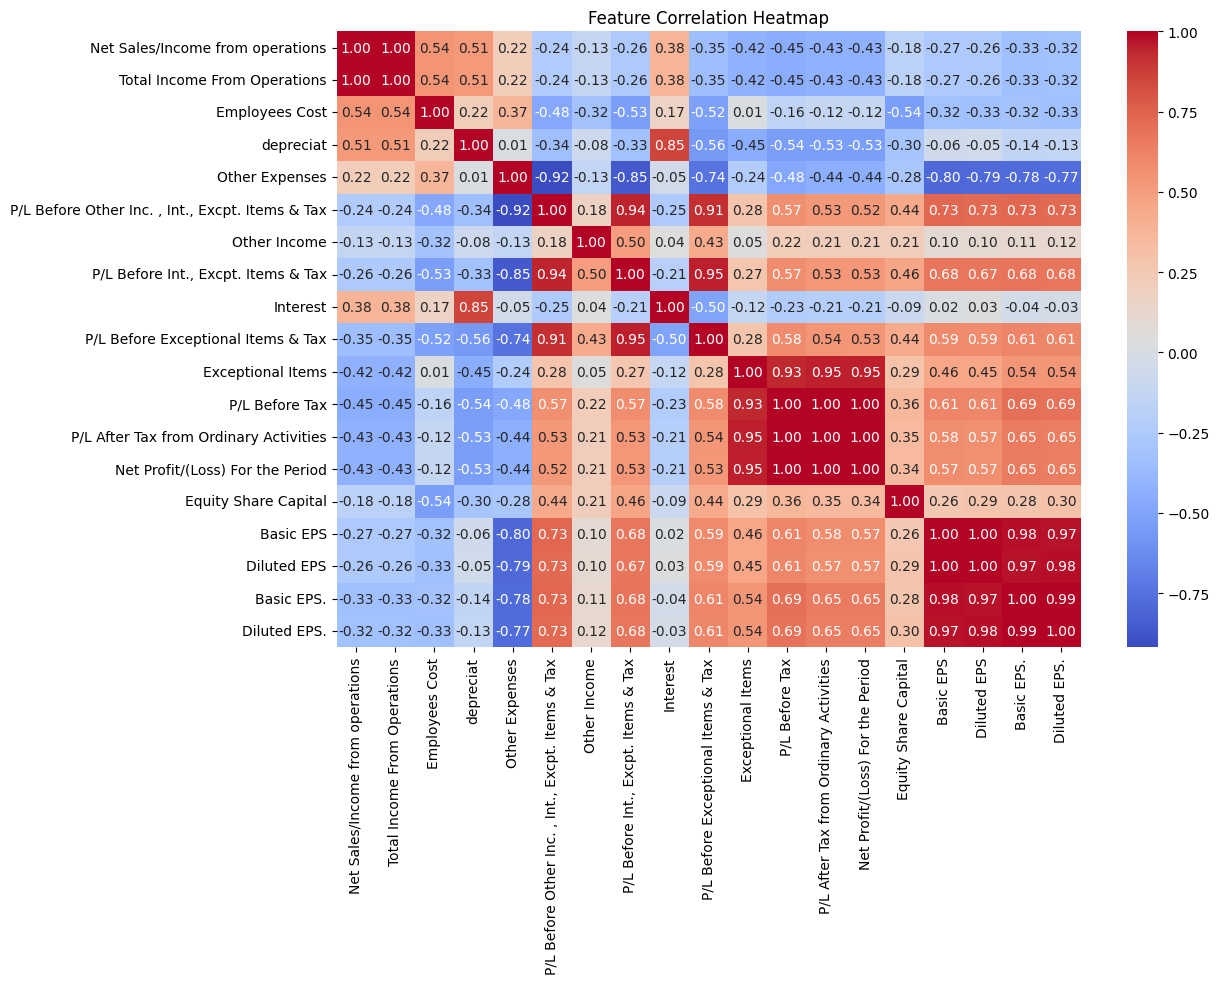

In [22]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [37]:
# Step 1: Compute the Covariance Matrix
cov_matrix = np.cov(df_numeric.T)
print("\nCovariance Matrix:\n")
print(pd.DataFrame(cov_matrix, index=df_numeric.columns, columns=df_numeric.columns).round(4))



Covariance Matrix:

                                                  Net Sales/Income from operations  \
Net Sales/Income from operations                                            1.0227   
Total Income From Operations                                                1.0227   
Employees Cost                                                              0.5553   
depreciat                                                                   0.5259   
Other Expenses                                                              0.2203   
P/L Before Other Inc. , Int., Excpt. Items & Tax                           -0.2463   
Other Income                                                               -0.1313   
P/L Before Int., Excpt. Items & Tax                                        -0.2615   
Interest                                                                    0.3916   
P/L Before Exceptional Items & Tax                                         -0.3559   
Exceptional Items                

In [38]:
# Step 2: Compute Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors:")
print(eigenvectors)

Eigenvalues:
[ 9.82758518e+00+0.00000000e+00j  2.96578009e+00+0.00000000e+00j
  2.29755439e+00+0.00000000e+00j  1.45668861e+00+0.00000000e+00j
  1.24134319e+00+0.00000000e+00j  8.61186112e-01+0.00000000e+00j
  4.75706595e-01+0.00000000e+00j  1.93279772e-01+0.00000000e+00j
  6.18818194e-02+0.00000000e+00j  3.28539974e-02+0.00000000e+00j
  1.08215299e-02+0.00000000e+00j  6.45534776e-03+0.00000000e+00j
  5.67431385e-04+0.00000000e+00j  1.14008520e-04+0.00000000e+00j
  1.04030985e-07+0.00000000e+00j  3.22225709e-16+2.50364462e-17j
  3.22225709e-16-2.50364462e-17j -2.20142455e-17+0.00000000e+00j
 -1.49422896e-16+0.00000000e+00j]
Eigenvectors:
[[-1.69230109e-01+0.00000000e+00j  3.30740790e-01+0.00000000e+00j
   1.17782302e-01+0.00000000e+00j  4.87894096e-01+0.00000000e+00j
   5.93131645e-02+0.00000000e+00j  1.23194014e-01+0.00000000e+00j
   1.44058138e-01+0.00000000e+00j  2.37406848e-01+0.00000000e+00j
  -1.13100508e-02+0.00000000e+00j  1.57390214e-02+0.00000000e+00j
  -2.09657370e-02+0.0000

In [25]:
# Step 3: Sort Eigenvalues and Eigenvectors in Descending Order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [26]:
print("Sorted Eigenvalues:")
print(eigenvalues)
print("Sorted Eigenvectors:")
print(eigenvectors)

Sorted Eigenvalues:
[ 9.82758518e+00+0.00000000e+00j  2.96578009e+00+0.00000000e+00j
  2.29755439e+00+0.00000000e+00j  1.45668861e+00+0.00000000e+00j
  1.24134319e+00+0.00000000e+00j  8.61186112e-01+0.00000000e+00j
  4.75706595e-01+0.00000000e+00j  1.93279772e-01+0.00000000e+00j
  6.18818194e-02+0.00000000e+00j  3.28539974e-02+0.00000000e+00j
  1.08215299e-02+0.00000000e+00j  6.45534776e-03+0.00000000e+00j
  5.67431385e-04+0.00000000e+00j  1.14008520e-04+0.00000000e+00j
  1.04030985e-07+0.00000000e+00j  3.22225709e-16+2.50364462e-17j
  3.22225709e-16-2.50364462e-17j -2.20142455e-17+0.00000000e+00j
 -1.49422896e-16+0.00000000e+00j]
Sorted Eigenvectors:
[[-1.69230109e-01+0.00000000e+00j  3.30740790e-01+0.00000000e+00j
   1.17782302e-01+0.00000000e+00j  4.87894096e-01+0.00000000e+00j
   5.93131645e-02+0.00000000e+00j  1.23194014e-01+0.00000000e+00j
   1.44058138e-01+0.00000000e+00j  2.37406848e-01+0.00000000e+00j
  -1.13100508e-02+0.00000000e+00j  1.57390214e-02+0.00000000e+00j
  -2.09657

In [27]:
# Step 4: Compute Explained Variance
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print("Explained Variance Ratio:")
print(explained_variance_ratio)

Explained Variance Ratio:
[ 5.05747073e-01+0.0000000e+00j  1.52624940e-01+0.0000000e+00j
  1.18236717e-01+0.0000000e+00j  7.49640923e-02+0.0000000e+00j
  6.38819888e-02+0.0000000e+00j  4.43183496e-02+0.0000000e+00j
  2.44808072e-02+0.0000000e+00j  9.94656138e-03+0.0000000e+00j
  3.18456146e-03+0.0000000e+00j  1.69073203e-03+0.0000000e+00j
  5.56897444e-04+0.0000000e+00j  3.32205031e-04+0.0000000e+00j
  2.92011473e-05+0.0000000e+00j  5.86710511e-06+0.0000000e+00j
  5.35364132e-09+0.0000000e+00j  1.65823756e-17+1.2884253e-18j
  1.65823756e-17-1.2884253e-18j -1.13289684e-18+0.0000000e+00j
 -7.68959935e-18+0.0000000e+00j]


In [28]:
# Step 5: Apply PCA Transformation
pca = PCA(n_components=0.95)  # Retain 95% variance
principal_components = pca.fit_transform(df_numeric)

In [29]:
# Step 6: Get the Most Important Features
feature_importance = abs(pca.components_).sum(axis=0)
feature_names = df_numeric.columns
important_features = [feature for _, feature in sorted(zip(feature_importance, feature_names), reverse=True)]

In [30]:
print("Most Prominent Features:")
# print(important_features)

for fea in important_features:
    print(fea)

Most Prominent Features:
Other Income
Equity Share Capital
Interest
Employees Cost
Total Income From Operations
Net Sales/Income from operations
depreciat
Exceptional Items
P/L Before Int., Excpt. Items & Tax
P/L Before Exceptional Items & Tax
P/L Before Other Inc. , Int., Excpt. Items & Tax
Net Profit/(Loss) For the Period
P/L After Tax from Ordinary Activities
P/L Before Tax
Basic EPS
Diluted EPS
Basic EPS.
Other Expenses
Diluted EPS.


In [31]:
# Step 7: Print Principal Components
principal_df = pd.DataFrame(pca.components_, columns=df_numeric.columns, index=[f'PC{i+1}' for i in range(len(pca.components_))])
print("Principal Components (PC1, PC2, ...):")
print(principal_df)

Principal Components (PC1, PC2, ...):
     Net Sales/Income from operations  Total Income From Operations  \
PC1                         -0.169230                     -0.169230   
PC2                          0.330741                      0.330741   
PC3                          0.117782                      0.117782   
PC4                          0.487894                      0.487894   
PC5                         -0.059313                     -0.059313   
PC6                          0.123194                      0.123194   

     Employees Cost  depreciat  Other Expenses  \
PC1       -0.152628  -0.152260       -0.249941   
PC2        0.034730   0.444512       -0.283616   
PC3        0.444216   0.098559        0.113593   
PC4        0.272581  -0.221496        0.019155   
PC5       -0.240079   0.241760        0.115934   
PC6       -0.234116  -0.055509        0.048742   

     P/L Before Other Inc. , Int., Excpt. Items & Tax  Other Income  \
PC1                                       

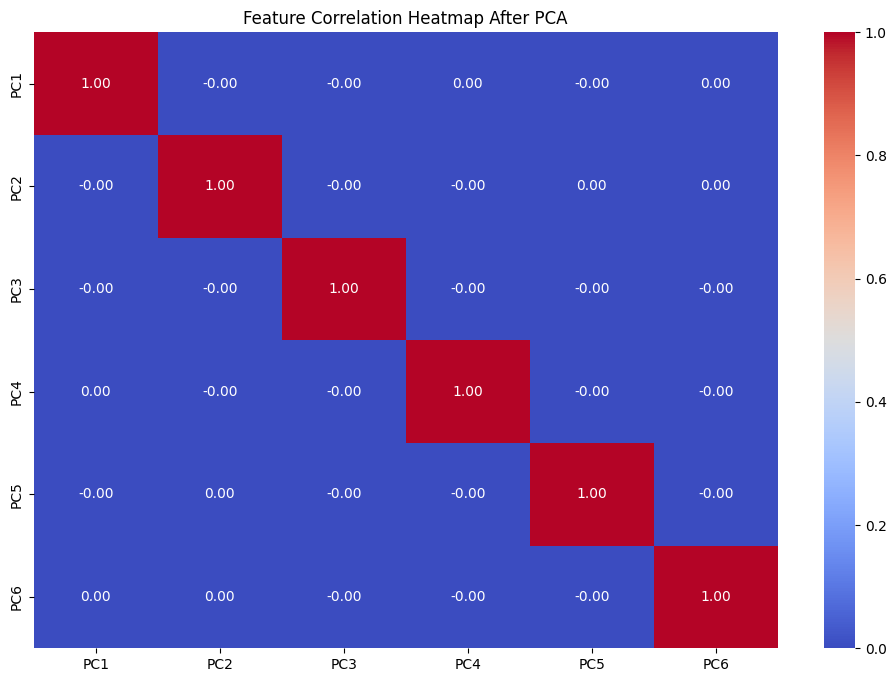

In [32]:
# Step 8: Create a Heatmap of the Transformed Dataset After PCA
transformed_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])
plt.figure(figsize=(12, 8))
sns.heatmap(transformed_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap After PCA")
plt.show()

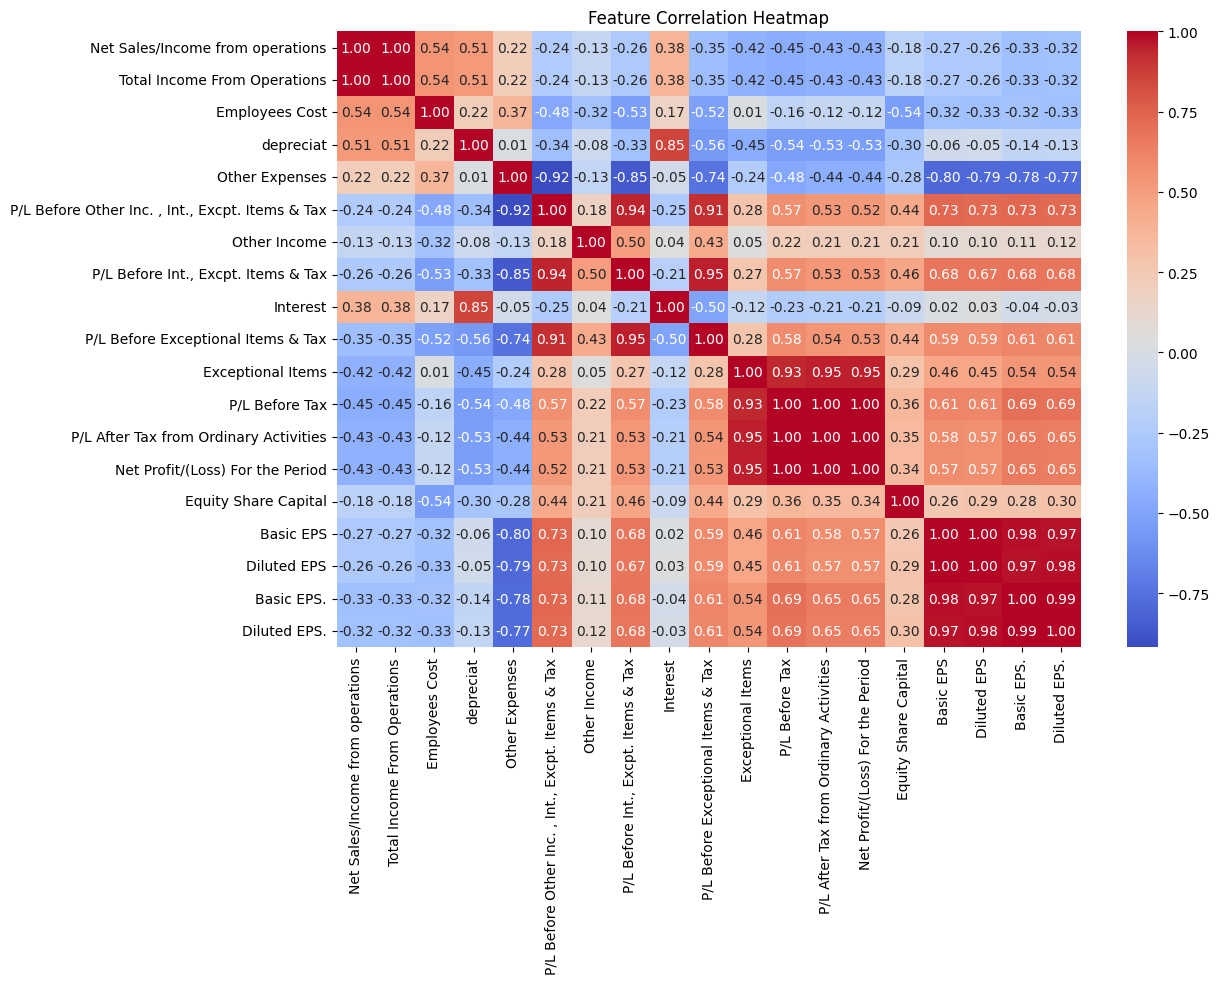

In [33]:

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()